# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [ ]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'

import helper

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

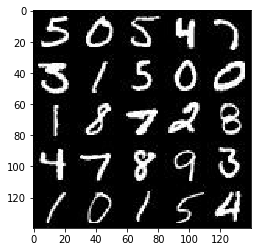

In [1]:
show_n_images = 25
import helper
data_dir = './data'
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

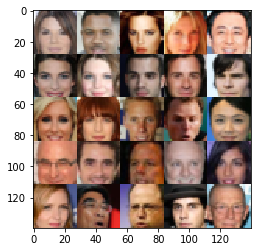

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [3]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [1]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    inputs_real = tf.placeholder(tf.float32, (None, image_width,image_height,image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32)

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [12]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28ximage_channels
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same') #input, filters, kernel size, strides, padding
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same') #increasing number of features(filters) each time
                                                                        #stride of 2 halves the height and width
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256
                
        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [16]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        #x1 = tf.layers.dense(z, 7*7*256)
        
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 14x14x256 now
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 28x28x128 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
        # 28x28x3 now
        
        out = tf.tanh(logits)
        
        return out



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [17]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
       
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss,g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [18]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [19]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [20]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode,
          print_every=10, show_every=100):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    input_real, input_z, l_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss,g_loss = model_loss(input_real, input_z, data_shape[3])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                # Rescaling input to [-1, 1]
                batch_images *= 2
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z, input_real: batch_images})
                
                
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                
                if steps % show_every == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 4.9814... Generator Loss: 0.0139
Epoch 1/2... Discriminator Loss: 0.0000... Generator Loss: 22.6801
Epoch 1/2... Discriminator Loss: 0.3054... Generator Loss: 2.7333
Epoch 1/2... Discriminator Loss: 0.7521... Generator Loss: 0.8967
Epoch 1/2... Discriminator Loss: 1.2725... Generator Loss: 0.8765
Epoch 1/2... Discriminator Loss: 1.3372... Generator Loss: 0.5777
Epoch 1/2... Discriminator Loss: 0.8152... Generator Loss: 2.0485
Epoch 1/2... Discriminator Loss: 0.8242... Generator Loss: 2.3573
Epoch 1/2... Discriminator Loss: 0.8970... Generator Loss: 1.1134
Epoch 1/2... Discriminator Loss: 3.2373... Generator Loss: 0.0629


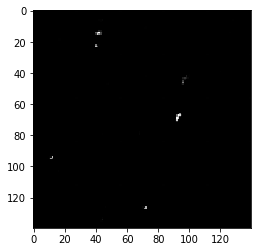

Epoch 1/2... Discriminator Loss: 1.1802... Generator Loss: 0.7585
Epoch 1/2... Discriminator Loss: 1.4489... Generator Loss: 3.1011
Epoch 1/2... Discriminator Loss: 2.0523... Generator Loss: 0.2169
Epoch 1/2... Discriminator Loss: 1.0812... Generator Loss: 0.8589
Epoch 1/2... Discriminator Loss: 0.8581... Generator Loss: 1.1096
Epoch 1/2... Discriminator Loss: 0.8439... Generator Loss: 2.0815
Epoch 1/2... Discriminator Loss: 1.0828... Generator Loss: 0.6446
Epoch 1/2... Discriminator Loss: 0.9471... Generator Loss: 3.2708
Epoch 1/2... Discriminator Loss: 1.3049... Generator Loss: 0.4192
Epoch 1/2... Discriminator Loss: 0.9486... Generator Loss: 0.9149


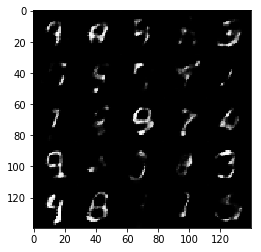

Epoch 1/2... Discriminator Loss: 1.3340... Generator Loss: 0.5329
Epoch 1/2... Discriminator Loss: 1.3385... Generator Loss: 0.9747
Epoch 1/2... Discriminator Loss: 1.1191... Generator Loss: 1.9344
Epoch 1/2... Discriminator Loss: 1.0298... Generator Loss: 1.8313
Epoch 1/2... Discriminator Loss: 1.0547... Generator Loss: 0.8323
Epoch 1/2... Discriminator Loss: 1.0633... Generator Loss: 1.4847
Epoch 1/2... Discriminator Loss: 1.1025... Generator Loss: 0.6881
Epoch 1/2... Discriminator Loss: 0.9896... Generator Loss: 1.2418
Epoch 1/2... Discriminator Loss: 0.9686... Generator Loss: 1.0217
Epoch 1/2... Discriminator Loss: 1.0041... Generator Loss: 0.9775


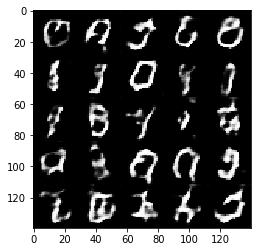

Epoch 1/2... Discriminator Loss: 1.3412... Generator Loss: 0.4606
Epoch 1/2... Discriminator Loss: 1.2341... Generator Loss: 0.5956
Epoch 1/2... Discriminator Loss: 1.1733... Generator Loss: 1.7250
Epoch 1/2... Discriminator Loss: 1.0908... Generator Loss: 0.7219
Epoch 1/2... Discriminator Loss: 1.2776... Generator Loss: 0.5560
Epoch 1/2... Discriminator Loss: 1.1090... Generator Loss: 0.8615
Epoch 1/2... Discriminator Loss: 1.1163... Generator Loss: 1.3726
Epoch 1/2... Discriminator Loss: 1.0290... Generator Loss: 1.1184
Epoch 1/2... Discriminator Loss: 1.1594... Generator Loss: 0.7985
Epoch 1/2... Discriminator Loss: 0.9042... Generator Loss: 0.8377


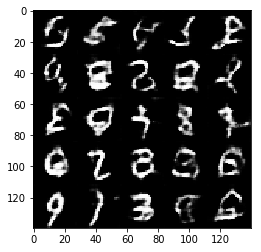

Epoch 1/2... Discriminator Loss: 1.0504... Generator Loss: 0.9710
Epoch 1/2... Discriminator Loss: 1.1253... Generator Loss: 1.3890
Epoch 1/2... Discriminator Loss: 1.5065... Generator Loss: 0.3781
Epoch 1/2... Discriminator Loss: 0.9736... Generator Loss: 1.2190
Epoch 1/2... Discriminator Loss: 1.0107... Generator Loss: 1.1226
Epoch 1/2... Discriminator Loss: 1.3994... Generator Loss: 0.3713
Epoch 1/2... Discriminator Loss: 1.0529... Generator Loss: 0.7450
Epoch 1/2... Discriminator Loss: 1.1716... Generator Loss: 0.7360
Epoch 1/2... Discriminator Loss: 1.0955... Generator Loss: 0.9856
Epoch 1/2... Discriminator Loss: 1.3016... Generator Loss: 0.4532


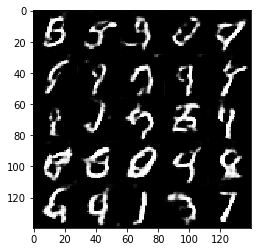

Epoch 1/2... Discriminator Loss: 1.1489... Generator Loss: 0.8411
Epoch 1/2... Discriminator Loss: 1.4063... Generator Loss: 0.4603
Epoch 1/2... Discriminator Loss: 1.1542... Generator Loss: 0.7768
Epoch 1/2... Discriminator Loss: 1.1340... Generator Loss: 1.4529
Epoch 1/2... Discriminator Loss: 1.1135... Generator Loss: 0.7214
Epoch 1/2... Discriminator Loss: 1.1429... Generator Loss: 1.5202
Epoch 1/2... Discriminator Loss: 1.0948... Generator Loss: 0.8215
Epoch 1/2... Discriminator Loss: 1.2279... Generator Loss: 1.3957
Epoch 1/2... Discriminator Loss: 1.1285... Generator Loss: 0.7085
Epoch 1/2... Discriminator Loss: 1.0525... Generator Loss: 1.1912


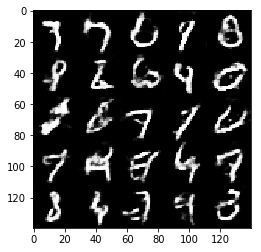

Epoch 1/2... Discriminator Loss: 1.0096... Generator Loss: 0.7827
Epoch 1/2... Discriminator Loss: 1.1179... Generator Loss: 1.0062
Epoch 1/2... Discriminator Loss: 1.0285... Generator Loss: 1.0013
Epoch 1/2... Discriminator Loss: 1.0850... Generator Loss: 0.6562
Epoch 1/2... Discriminator Loss: 1.0076... Generator Loss: 0.7670
Epoch 1/2... Discriminator Loss: 1.3816... Generator Loss: 0.4125
Epoch 1/2... Discriminator Loss: 1.0238... Generator Loss: 0.7693
Epoch 1/2... Discriminator Loss: 0.9809... Generator Loss: 1.2174
Epoch 1/2... Discriminator Loss: 4.2715... Generator Loss: 5.1461
Epoch 1/2... Discriminator Loss: 1.1740... Generator Loss: 0.6783


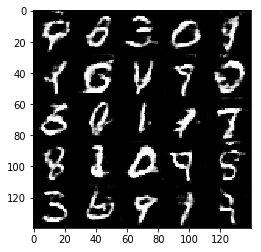

Epoch 1/2... Discriminator Loss: 1.0894... Generator Loss: 0.7644
Epoch 1/2... Discriminator Loss: 1.0335... Generator Loss: 1.1045
Epoch 1/2... Discriminator Loss: 1.2936... Generator Loss: 0.4739
Epoch 1/2... Discriminator Loss: 1.2369... Generator Loss: 0.6814
Epoch 1/2... Discriminator Loss: 1.2624... Generator Loss: 0.4900
Epoch 1/2... Discriminator Loss: 0.9669... Generator Loss: 0.8482
Epoch 1/2... Discriminator Loss: 1.1218... Generator Loss: 1.2114
Epoch 1/2... Discriminator Loss: 1.3217... Generator Loss: 0.4857
Epoch 1/2... Discriminator Loss: 1.0484... Generator Loss: 1.2304
Epoch 1/2... Discriminator Loss: 1.0788... Generator Loss: 0.7211


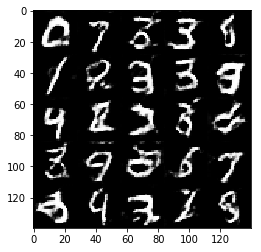

Epoch 1/2... Discriminator Loss: 0.9808... Generator Loss: 1.3085
Epoch 1/2... Discriminator Loss: 0.8647... Generator Loss: 0.8630
Epoch 1/2... Discriminator Loss: 2.1619... Generator Loss: 0.1818
Epoch 1/2... Discriminator Loss: 1.1824... Generator Loss: 0.6109
Epoch 1/2... Discriminator Loss: 1.7730... Generator Loss: 0.2695
Epoch 1/2... Discriminator Loss: 1.3213... Generator Loss: 0.4346
Epoch 1/2... Discriminator Loss: 1.0152... Generator Loss: 1.0566
Epoch 1/2... Discriminator Loss: 1.1523... Generator Loss: 0.5973
Epoch 1/2... Discriminator Loss: 1.2808... Generator Loss: 1.3090
Epoch 1/2... Discriminator Loss: 0.9636... Generator Loss: 0.7954


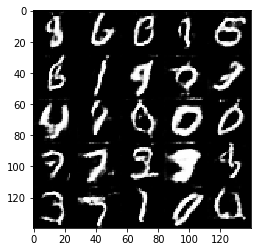

Epoch 1/2... Discriminator Loss: 1.4471... Generator Loss: 0.3983
Epoch 1/2... Discriminator Loss: 1.2325... Generator Loss: 0.4820
Epoch 1/2... Discriminator Loss: 1.2554... Generator Loss: 0.5175
Epoch 2/2... Discriminator Loss: 1.1071... Generator Loss: 1.3291
Epoch 2/2... Discriminator Loss: 0.9909... Generator Loss: 1.1303
Epoch 2/2... Discriminator Loss: 0.9228... Generator Loss: 0.9798
Epoch 2/2... Discriminator Loss: 1.2931... Generator Loss: 1.6322
Epoch 2/2... Discriminator Loss: 0.7186... Generator Loss: 1.0135
Epoch 2/2... Discriminator Loss: 2.2366... Generator Loss: 0.1730
Epoch 2/2... Discriminator Loss: 1.3773... Generator Loss: 0.4573


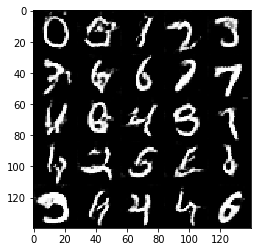

Epoch 2/2... Discriminator Loss: 0.9572... Generator Loss: 0.9798
Epoch 2/2... Discriminator Loss: 1.2341... Generator Loss: 0.6008
Epoch 2/2... Discriminator Loss: 1.3032... Generator Loss: 0.4457
Epoch 2/2... Discriminator Loss: 0.8831... Generator Loss: 1.6989
Epoch 2/2... Discriminator Loss: 0.7841... Generator Loss: 1.1733
Epoch 2/2... Discriminator Loss: 1.0954... Generator Loss: 1.8106
Epoch 2/2... Discriminator Loss: 1.0939... Generator Loss: 0.6649
Epoch 2/2... Discriminator Loss: 0.9683... Generator Loss: 2.2705
Epoch 2/2... Discriminator Loss: 0.8942... Generator Loss: 0.8719
Epoch 2/2... Discriminator Loss: 1.1832... Generator Loss: 1.5989


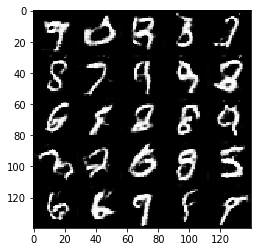

Epoch 2/2... Discriminator Loss: 0.9966... Generator Loss: 1.1653
Epoch 2/2... Discriminator Loss: 1.1656... Generator Loss: 0.6805
Epoch 2/2... Discriminator Loss: 1.1291... Generator Loss: 0.7080
Epoch 2/2... Discriminator Loss: 0.7324... Generator Loss: 1.2443
Epoch 2/2... Discriminator Loss: 0.9938... Generator Loss: 0.6564
Epoch 2/2... Discriminator Loss: 1.5896... Generator Loss: 0.3417
Epoch 2/2... Discriminator Loss: 1.4640... Generator Loss: 0.3807
Epoch 2/2... Discriminator Loss: 0.7266... Generator Loss: 1.1158
Epoch 2/2... Discriminator Loss: 0.6400... Generator Loss: 1.2619
Epoch 2/2... Discriminator Loss: 0.8046... Generator Loss: 1.4431


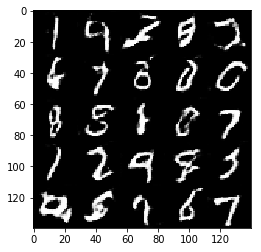

Epoch 2/2... Discriminator Loss: 0.9193... Generator Loss: 0.9162
Epoch 2/2... Discriminator Loss: 0.5929... Generator Loss: 1.1798
Epoch 2/2... Discriminator Loss: 1.9158... Generator Loss: 0.2724
Epoch 2/2... Discriminator Loss: 0.8970... Generator Loss: 0.7299
Epoch 2/2... Discriminator Loss: 1.9837... Generator Loss: 0.2135
Epoch 2/2... Discriminator Loss: 0.9172... Generator Loss: 0.9117
Epoch 2/2... Discriminator Loss: 1.1414... Generator Loss: 0.6055
Epoch 2/2... Discriminator Loss: 1.5577... Generator Loss: 0.4036
Epoch 2/2... Discriminator Loss: 1.2099... Generator Loss: 1.4050
Epoch 2/2... Discriminator Loss: 0.7398... Generator Loss: 1.7435


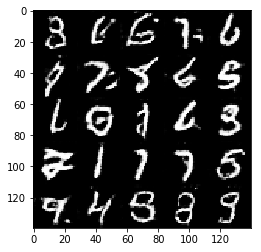

Epoch 2/2... Discriminator Loss: 1.7937... Generator Loss: 0.2586
Epoch 2/2... Discriminator Loss: 1.0561... Generator Loss: 2.1189
Epoch 2/2... Discriminator Loss: 0.7259... Generator Loss: 1.3523
Epoch 2/2... Discriminator Loss: 1.1940... Generator Loss: 0.5336
Epoch 2/2... Discriminator Loss: 0.8323... Generator Loss: 1.9494
Epoch 2/2... Discriminator Loss: 0.7490... Generator Loss: 1.0944
Epoch 2/2... Discriminator Loss: 0.9208... Generator Loss: 0.8093
Epoch 2/2... Discriminator Loss: 0.5366... Generator Loss: 1.3863
Epoch 2/2... Discriminator Loss: 1.5255... Generator Loss: 4.1201
Epoch 2/2... Discriminator Loss: 0.7318... Generator Loss: 1.6007


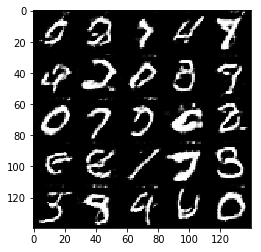

Epoch 2/2... Discriminator Loss: 0.9112... Generator Loss: 1.3865
Epoch 2/2... Discriminator Loss: 0.8206... Generator Loss: 1.2911
Epoch 2/2... Discriminator Loss: 0.8188... Generator Loss: 1.8653
Epoch 2/2... Discriminator Loss: 1.1742... Generator Loss: 0.6093
Epoch 2/2... Discriminator Loss: 0.7490... Generator Loss: 1.4655
Epoch 2/2... Discriminator Loss: 0.4796... Generator Loss: 1.9138
Epoch 2/2... Discriminator Loss: 0.8435... Generator Loss: 1.0434
Epoch 2/2... Discriminator Loss: 1.7683... Generator Loss: 0.2974
Epoch 2/2... Discriminator Loss: 0.8713... Generator Loss: 0.8278
Epoch 2/2... Discriminator Loss: 0.7713... Generator Loss: 1.0896


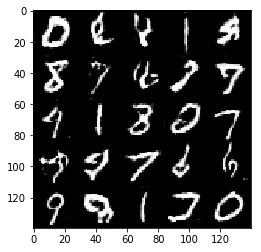

Epoch 2/2... Discriminator Loss: 0.5757... Generator Loss: 1.2561
Epoch 2/2... Discriminator Loss: 1.0879... Generator Loss: 0.6934
Epoch 2/2... Discriminator Loss: 0.6617... Generator Loss: 2.2861
Epoch 2/2... Discriminator Loss: 0.9559... Generator Loss: 2.5132
Epoch 2/2... Discriminator Loss: 0.5855... Generator Loss: 1.3808
Epoch 2/2... Discriminator Loss: 0.9318... Generator Loss: 0.9321
Epoch 2/2... Discriminator Loss: 0.8093... Generator Loss: 0.9065
Epoch 2/2... Discriminator Loss: 0.3827... Generator Loss: 1.9360
Epoch 2/2... Discriminator Loss: 0.6067... Generator Loss: 1.3332
Epoch 2/2... Discriminator Loss: 0.6173... Generator Loss: 1.3267


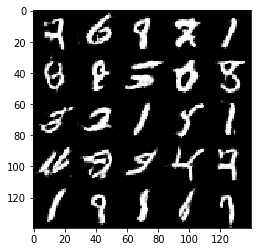

Epoch 2/2... Discriminator Loss: 1.7554... Generator Loss: 0.2980
Epoch 2/2... Discriminator Loss: 1.0323... Generator Loss: 0.7934
Epoch 2/2... Discriminator Loss: 1.0544... Generator Loss: 0.6440
Epoch 2/2... Discriminator Loss: 0.3749... Generator Loss: 1.7384
Epoch 2/2... Discriminator Loss: 0.4927... Generator Loss: 1.7877
Epoch 2/2... Discriminator Loss: 0.2924... Generator Loss: 2.1702
Epoch 2/2... Discriminator Loss: 2.1146... Generator Loss: 0.2564
Epoch 2/2... Discriminator Loss: 0.5450... Generator Loss: 1.5507
Epoch 2/2... Discriminator Loss: 0.6684... Generator Loss: 1.2278
Epoch 2/2... Discriminator Loss: 0.4973... Generator Loss: 1.3161


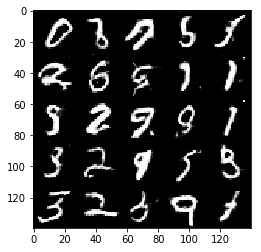

Epoch 2/2... Discriminator Loss: 0.5185... Generator Loss: 1.4324
Epoch 2/2... Discriminator Loss: 0.3654... Generator Loss: 1.6706
Epoch 2/2... Discriminator Loss: 1.4456... Generator Loss: 0.4693
Epoch 2/2... Discriminator Loss: 2.6148... Generator Loss: 4.9897
Epoch 2/2... Discriminator Loss: 0.6280... Generator Loss: 1.8888
Epoch 2/2... Discriminator Loss: 0.7791... Generator Loss: 0.9970
Epoch 2/2... Discriminator Loss: 0.5000... Generator Loss: 1.3996
Epoch 2/2... Discriminator Loss: 1.2943... Generator Loss: 0.4711
Epoch 2/2... Discriminator Loss: 1.4376... Generator Loss: 0.4496
Epoch 2/2... Discriminator Loss: 2.9594... Generator Loss: 5.1256


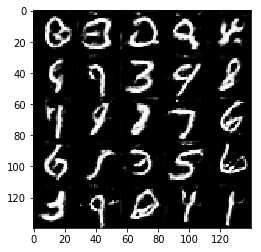

Epoch 2/2... Discriminator Loss: 1.6984... Generator Loss: 0.3577
Epoch 2/2... Discriminator Loss: 1.4253... Generator Loss: 3.7598
Epoch 2/2... Discriminator Loss: 1.0582... Generator Loss: 0.6504
Epoch 2/2... Discriminator Loss: 0.8441... Generator Loss: 0.8348
Epoch 2/2... Discriminator Loss: 0.7143... Generator Loss: 0.9871
Epoch 2/2... Discriminator Loss: 0.5546... Generator Loss: 1.8459
Epoch 2/2... Discriminator Loss: 0.6643... Generator Loss: 1.1339


In [21]:
batch_size = 64
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.0403... Generator Loss: 16.5889
Epoch 1/1... Discriminator Loss: 0.0166... Generator Loss: 5.5465
Epoch 1/1... Discriminator Loss: 0.5395... Generator Loss: 2.0028
Epoch 1/1... Discriminator Loss: 0.9062... Generator Loss: 15.5855
Epoch 1/1... Discriminator Loss: 3.4672... Generator Loss: 0.1512
Epoch 1/1... Discriminator Loss: 1.8294... Generator Loss: 1.8263
Epoch 1/1... Discriminator Loss: 0.9928... Generator Loss: 1.1229
Epoch 1/1... Discriminator Loss: 2.2678... Generator Loss: 0.1758
Epoch 1/1... Discriminator Loss: 1.5837... Generator Loss: 0.4257
Epoch 1/1... Discriminator Loss: 0.5812... Generator Loss: 1.2890


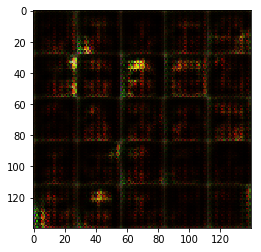

Epoch 1/1... Discriminator Loss: 0.1053... Generator Loss: 4.1090
Epoch 1/1... Discriminator Loss: 0.1994... Generator Loss: 3.1482
Epoch 1/1... Discriminator Loss: 14.6391... Generator Loss: 21.0982
Epoch 1/1... Discriminator Loss: 0.2411... Generator Loss: 2.0840
Epoch 1/1... Discriminator Loss: 2.3169... Generator Loss: 7.0396
Epoch 1/1... Discriminator Loss: 0.9413... Generator Loss: 0.6552
Epoch 1/1... Discriminator Loss: 0.8716... Generator Loss: 1.1298
Epoch 1/1... Discriminator Loss: 1.1380... Generator Loss: 0.6451
Epoch 1/1... Discriminator Loss: 2.0371... Generator Loss: 0.3953
Epoch 1/1... Discriminator Loss: 0.4437... Generator Loss: 2.4982


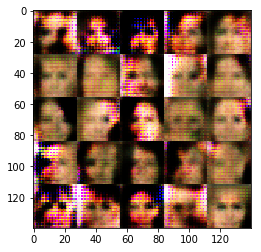

Epoch 1/1... Discriminator Loss: 0.4629... Generator Loss: 2.2319
Epoch 1/1... Discriminator Loss: 2.7624... Generator Loss: 1.5779
Epoch 1/1... Discriminator Loss: 1.2468... Generator Loss: 0.5002
Epoch 1/1... Discriminator Loss: 3.5117... Generator Loss: 0.0544
Epoch 1/1... Discriminator Loss: 0.3981... Generator Loss: 2.0276
Epoch 1/1... Discriminator Loss: 0.6862... Generator Loss: 0.9842
Epoch 1/1... Discriminator Loss: 1.2708... Generator Loss: 0.4636
Epoch 1/1... Discriminator Loss: 2.3498... Generator Loss: 0.1282
Epoch 1/1... Discriminator Loss: 1.8054... Generator Loss: 0.2306
Epoch 1/1... Discriminator Loss: 2.3193... Generator Loss: 0.1333


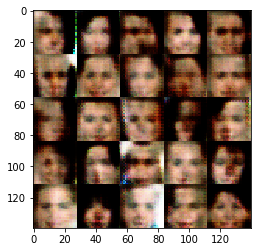

Epoch 1/1... Discriminator Loss: 1.4826... Generator Loss: 0.5563
Epoch 1/1... Discriminator Loss: 1.6969... Generator Loss: 0.2966
Epoch 1/1... Discriminator Loss: 1.6791... Generator Loss: 0.2967
Epoch 1/1... Discriminator Loss: 1.8387... Generator Loss: 0.2345
Epoch 1/1... Discriminator Loss: 0.5771... Generator Loss: 1.8198
Epoch 1/1... Discriminator Loss: 1.2276... Generator Loss: 0.4886
Epoch 1/1... Discriminator Loss: 1.0502... Generator Loss: 0.9191
Epoch 1/1... Discriminator Loss: 0.7097... Generator Loss: 1.9029
Epoch 1/1... Discriminator Loss: 1.2549... Generator Loss: 0.9906
Epoch 1/1... Discriminator Loss: 3.0110... Generator Loss: 0.0543


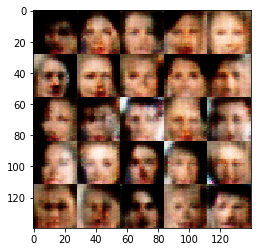

Epoch 1/1... Discriminator Loss: 3.0857... Generator Loss: 3.5330
Epoch 1/1... Discriminator Loss: 1.8347... Generator Loss: 0.2057
Epoch 1/1... Discriminator Loss: 1.8853... Generator Loss: 0.2182
Epoch 1/1... Discriminator Loss: 1.4339... Generator Loss: 0.6673
Epoch 1/1... Discriminator Loss: 1.0106... Generator Loss: 0.6777
Epoch 1/1... Discriminator Loss: 1.5554... Generator Loss: 0.2758
Epoch 1/1... Discriminator Loss: 0.9736... Generator Loss: 0.9613
Epoch 1/1... Discriminator Loss: 1.3366... Generator Loss: 0.4742
Epoch 1/1... Discriminator Loss: 1.3030... Generator Loss: 0.7133
Epoch 1/1... Discriminator Loss: 1.0300... Generator Loss: 0.7337


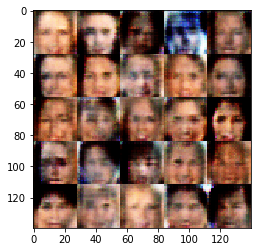

Epoch 1/1... Discriminator Loss: 1.3349... Generator Loss: 0.4090
Epoch 1/1... Discriminator Loss: 2.3147... Generator Loss: 0.1925
Epoch 1/1... Discriminator Loss: 0.7687... Generator Loss: 1.3913
Epoch 1/1... Discriminator Loss: 1.6355... Generator Loss: 0.5901
Epoch 1/1... Discriminator Loss: 1.6394... Generator Loss: 0.2988
Epoch 1/1... Discriminator Loss: 1.8820... Generator Loss: 0.2155
Epoch 1/1... Discriminator Loss: 1.1500... Generator Loss: 0.6877
Epoch 1/1... Discriminator Loss: 2.4467... Generator Loss: 2.0422
Epoch 1/1... Discriminator Loss: 1.4672... Generator Loss: 0.4241
Epoch 1/1... Discriminator Loss: 2.2392... Generator Loss: 2.4092


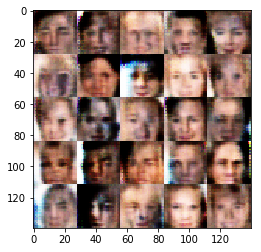

Epoch 1/1... Discriminator Loss: 0.9423... Generator Loss: 0.8139
Epoch 1/1... Discriminator Loss: 1.8738... Generator Loss: 0.6665
Epoch 1/1... Discriminator Loss: 1.1375... Generator Loss: 1.6312
Epoch 1/1... Discriminator Loss: 0.7950... Generator Loss: 1.1389
Epoch 1/1... Discriminator Loss: 1.3233... Generator Loss: 0.9587
Epoch 1/1... Discriminator Loss: 0.6193... Generator Loss: 1.2171
Epoch 1/1... Discriminator Loss: 1.4678... Generator Loss: 0.3429
Epoch 1/1... Discriminator Loss: 0.8990... Generator Loss: 0.7048
Epoch 1/1... Discriminator Loss: 1.6718... Generator Loss: 1.5489
Epoch 1/1... Discriminator Loss: 2.9051... Generator Loss: 0.0610


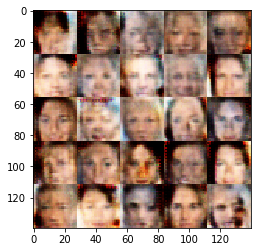

Epoch 1/1... Discriminator Loss: 0.8709... Generator Loss: 1.0755
Epoch 1/1... Discriminator Loss: 0.4068... Generator Loss: 2.2159
Epoch 1/1... Discriminator Loss: 1.2782... Generator Loss: 1.2749
Epoch 1/1... Discriminator Loss: 2.0428... Generator Loss: 0.1699
Epoch 1/1... Discriminator Loss: 2.3630... Generator Loss: 0.1094
Epoch 1/1... Discriminator Loss: 1.5474... Generator Loss: 1.4928
Epoch 1/1... Discriminator Loss: 0.8870... Generator Loss: 0.8981
Epoch 1/1... Discriminator Loss: 1.2040... Generator Loss: 0.5103
Epoch 1/1... Discriminator Loss: 1.7834... Generator Loss: 1.0558
Epoch 1/1... Discriminator Loss: 0.4977... Generator Loss: 1.9544


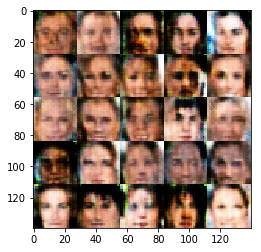

Epoch 1/1... Discriminator Loss: 1.0132... Generator Loss: 0.6098
Epoch 1/1... Discriminator Loss: 0.9247... Generator Loss: 0.7174
Epoch 1/1... Discriminator Loss: 2.0870... Generator Loss: 0.1792
Epoch 1/1... Discriminator Loss: 1.3867... Generator Loss: 1.4126
Epoch 1/1... Discriminator Loss: 1.1516... Generator Loss: 0.5261
Epoch 1/1... Discriminator Loss: 1.9134... Generator Loss: 0.1964
Epoch 1/1... Discriminator Loss: 1.1292... Generator Loss: 0.6461
Epoch 1/1... Discriminator Loss: 1.7723... Generator Loss: 0.4013
Epoch 1/1... Discriminator Loss: 0.6784... Generator Loss: 0.8379
Epoch 1/1... Discriminator Loss: 1.6263... Generator Loss: 0.4286


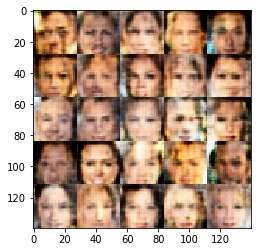

Epoch 1/1... Discriminator Loss: 1.1485... Generator Loss: 0.7398
Epoch 1/1... Discriminator Loss: 0.4583... Generator Loss: 2.0515
Epoch 1/1... Discriminator Loss: 1.3109... Generator Loss: 1.0285
Epoch 1/1... Discriminator Loss: 1.7339... Generator Loss: 2.3379
Epoch 1/1... Discriminator Loss: 1.1219... Generator Loss: 0.8663
Epoch 1/1... Discriminator Loss: 1.5586... Generator Loss: 0.2893
Epoch 1/1... Discriminator Loss: 1.1459... Generator Loss: 1.4594
Epoch 1/1... Discriminator Loss: 1.4772... Generator Loss: 0.4084
Epoch 1/1... Discriminator Loss: 1.7816... Generator Loss: 1.6391
Epoch 1/1... Discriminator Loss: 3.0900... Generator Loss: 3.2610


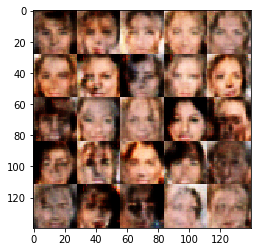

Epoch 1/1... Discriminator Loss: 0.7880... Generator Loss: 1.2468
Epoch 1/1... Discriminator Loss: 0.6542... Generator Loss: 0.7951
Epoch 1/1... Discriminator Loss: 1.1951... Generator Loss: 0.8369
Epoch 1/1... Discriminator Loss: 1.6725... Generator Loss: 0.6452
Epoch 1/1... Discriminator Loss: 0.8166... Generator Loss: 0.8458
Epoch 1/1... Discriminator Loss: 1.2529... Generator Loss: 0.6436
Epoch 1/1... Discriminator Loss: 1.3000... Generator Loss: 0.5293
Epoch 1/1... Discriminator Loss: 1.2983... Generator Loss: 0.3666
Epoch 1/1... Discriminator Loss: 1.9448... Generator Loss: 0.2907
Epoch 1/1... Discriminator Loss: 1.2168... Generator Loss: 0.6274


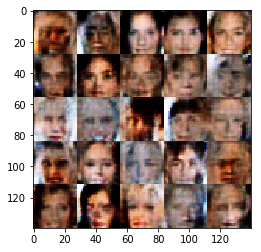

Epoch 1/1... Discriminator Loss: 0.9666... Generator Loss: 2.3513
Epoch 1/1... Discriminator Loss: 1.9676... Generator Loss: 0.4194
Epoch 1/1... Discriminator Loss: 1.2774... Generator Loss: 0.6105
Epoch 1/1... Discriminator Loss: 1.2616... Generator Loss: 0.7048
Epoch 1/1... Discriminator Loss: 1.4834... Generator Loss: 0.6704
Epoch 1/1... Discriminator Loss: 1.1696... Generator Loss: 0.8073
Epoch 1/1... Discriminator Loss: 0.7977... Generator Loss: 1.2352
Epoch 1/1... Discriminator Loss: 0.9891... Generator Loss: 2.2017
Epoch 1/1... Discriminator Loss: 0.7025... Generator Loss: 0.9324
Epoch 1/1... Discriminator Loss: 1.7905... Generator Loss: 0.9652


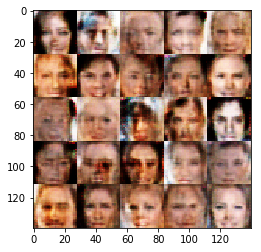

Epoch 1/1... Discriminator Loss: 1.3439... Generator Loss: 0.7754
Epoch 1/1... Discriminator Loss: 1.0198... Generator Loss: 0.6428
Epoch 1/1... Discriminator Loss: 2.3682... Generator Loss: 0.1147
Epoch 1/1... Discriminator Loss: 1.1993... Generator Loss: 0.5214
Epoch 1/1... Discriminator Loss: 1.0655... Generator Loss: 0.6004
Epoch 1/1... Discriminator Loss: 1.8484... Generator Loss: 0.3530
Epoch 1/1... Discriminator Loss: 1.5108... Generator Loss: 0.3376
Epoch 1/1... Discriminator Loss: 1.4835... Generator Loss: 0.5808
Epoch 1/1... Discriminator Loss: 1.4735... Generator Loss: 0.3284
Epoch 1/1... Discriminator Loss: 0.9751... Generator Loss: 0.6330


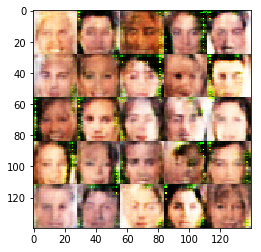

Epoch 1/1... Discriminator Loss: 1.3343... Generator Loss: 0.8909
Epoch 1/1... Discriminator Loss: 3.1800... Generator Loss: 2.3704
Epoch 1/1... Discriminator Loss: 1.6406... Generator Loss: 0.5022
Epoch 1/1... Discriminator Loss: 1.6669... Generator Loss: 0.3839
Epoch 1/1... Discriminator Loss: 1.4835... Generator Loss: 0.5108
Epoch 1/1... Discriminator Loss: 1.6846... Generator Loss: 0.3364
Epoch 1/1... Discriminator Loss: 1.3951... Generator Loss: 0.6637
Epoch 1/1... Discriminator Loss: 1.2449... Generator Loss: 0.8644
Epoch 1/1... Discriminator Loss: 1.5614... Generator Loss: 0.5681
Epoch 1/1... Discriminator Loss: 2.0513... Generator Loss: 0.2367


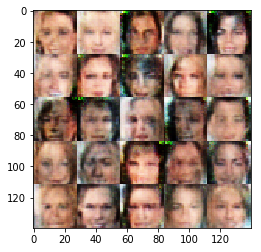

Epoch 1/1... Discriminator Loss: 1.5277... Generator Loss: 0.6566
Epoch 1/1... Discriminator Loss: 1.4190... Generator Loss: 0.6866
Epoch 1/1... Discriminator Loss: 1.6220... Generator Loss: 0.5778
Epoch 1/1... Discriminator Loss: 1.4785... Generator Loss: 0.6382
Epoch 1/1... Discriminator Loss: 1.7474... Generator Loss: 0.2420
Epoch 1/1... Discriminator Loss: 1.6300... Generator Loss: 0.5665
Epoch 1/1... Discriminator Loss: 2.2751... Generator Loss: 0.1210
Epoch 1/1... Discriminator Loss: 0.6539... Generator Loss: 1.1745
Epoch 1/1... Discriminator Loss: 0.8548... Generator Loss: 1.2318
Epoch 1/1... Discriminator Loss: 1.3800... Generator Loss: 0.4259


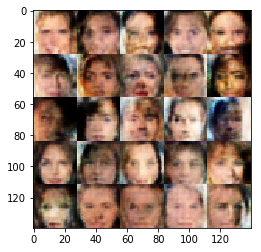

Epoch 1/1... Discriminator Loss: 0.8688... Generator Loss: 0.7873
Epoch 1/1... Discriminator Loss: 1.9758... Generator Loss: 0.1650
Epoch 1/1... Discriminator Loss: 1.2048... Generator Loss: 1.5846
Epoch 1/1... Discriminator Loss: 1.7208... Generator Loss: 0.2661
Epoch 1/1... Discriminator Loss: 1.1762... Generator Loss: 0.8671
Epoch 1/1... Discriminator Loss: 0.8127... Generator Loss: 1.5935
Epoch 1/1... Discriminator Loss: 2.0984... Generator Loss: 0.1496
Epoch 1/1... Discriminator Loss: 1.3383... Generator Loss: 1.1083
Epoch 1/1... Discriminator Loss: 1.2735... Generator Loss: 1.0543
Epoch 1/1... Discriminator Loss: 1.1329... Generator Loss: 0.4931


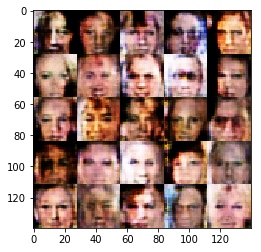

Epoch 1/1... Discriminator Loss: 0.9686... Generator Loss: 1.0419
Epoch 1/1... Discriminator Loss: 1.5986... Generator Loss: 0.2759
Epoch 1/1... Discriminator Loss: 0.5230... Generator Loss: 2.0212
Epoch 1/1... Discriminator Loss: 1.0255... Generator Loss: 0.6226
Epoch 1/1... Discriminator Loss: 1.5769... Generator Loss: 0.4677
Epoch 1/1... Discriminator Loss: 4.4498... Generator Loss: 3.5521
Epoch 1/1... Discriminator Loss: 1.4723... Generator Loss: 0.4624
Epoch 1/1... Discriminator Loss: 1.6020... Generator Loss: 0.3485
Epoch 1/1... Discriminator Loss: 1.3893... Generator Loss: 0.5312
Epoch 1/1... Discriminator Loss: 0.5542... Generator Loss: 1.1468


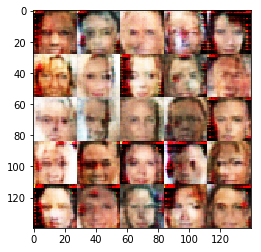

Epoch 1/1... Discriminator Loss: 1.4882... Generator Loss: 0.2834
Epoch 1/1... Discriminator Loss: 1.1118... Generator Loss: 0.6983
Epoch 1/1... Discriminator Loss: 1.6453... Generator Loss: 1.5324
Epoch 1/1... Discriminator Loss: 1.0855... Generator Loss: 0.5530
Epoch 1/1... Discriminator Loss: 1.6227... Generator Loss: 0.3792
Epoch 1/1... Discriminator Loss: 1.1284... Generator Loss: 0.4815
Epoch 1/1... Discriminator Loss: 1.2672... Generator Loss: 0.9705
Epoch 1/1... Discriminator Loss: 1.0909... Generator Loss: 0.6005
Epoch 1/1... Discriminator Loss: 0.6378... Generator Loss: 1.4212
Epoch 1/1... Discriminator Loss: 1.5866... Generator Loss: 0.3007


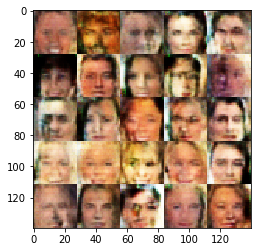

Epoch 1/1... Discriminator Loss: 1.3574... Generator Loss: 0.3589
Epoch 1/1... Discriminator Loss: 1.4821... Generator Loss: 0.5683
Epoch 1/1... Discriminator Loss: 0.5059... Generator Loss: 1.8141
Epoch 1/1... Discriminator Loss: 1.3615... Generator Loss: 0.5454
Epoch 1/1... Discriminator Loss: 0.4254... Generator Loss: 1.9849
Epoch 1/1... Discriminator Loss: 1.3664... Generator Loss: 1.9875
Epoch 1/1... Discriminator Loss: 1.2464... Generator Loss: 0.5714
Epoch 1/1... Discriminator Loss: 0.8335... Generator Loss: 0.6836
Epoch 1/1... Discriminator Loss: 1.3761... Generator Loss: 0.5172
Epoch 1/1... Discriminator Loss: 1.4195... Generator Loss: 0.4294


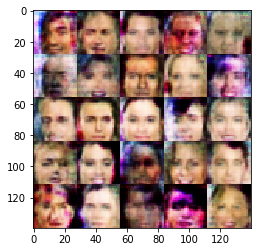

Epoch 1/1... Discriminator Loss: 1.9131... Generator Loss: 1.1494
Epoch 1/1... Discriminator Loss: 1.7038... Generator Loss: 0.3145
Epoch 1/1... Discriminator Loss: 0.8442... Generator Loss: 0.7916
Epoch 1/1... Discriminator Loss: 1.2842... Generator Loss: 0.4190
Epoch 1/1... Discriminator Loss: 0.8247... Generator Loss: 0.8333
Epoch 1/1... Discriminator Loss: 2.1920... Generator Loss: 2.9561
Epoch 1/1... Discriminator Loss: 1.9068... Generator Loss: 0.1896
Epoch 1/1... Discriminator Loss: 0.4768... Generator Loss: 1.5131
Epoch 1/1... Discriminator Loss: 1.1237... Generator Loss: 0.6566
Epoch 1/1... Discriminator Loss: 3.2150... Generator Loss: 0.0463


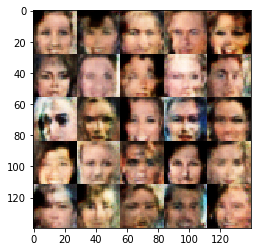

Epoch 1/1... Discriminator Loss: 1.4394... Generator Loss: 0.5808
Epoch 1/1... Discriminator Loss: 1.6624... Generator Loss: 0.4091
Epoch 1/1... Discriminator Loss: 1.6851... Generator Loss: 0.5765
Epoch 1/1... Discriminator Loss: 0.5123... Generator Loss: 1.3744
Epoch 1/1... Discriminator Loss: 1.9898... Generator Loss: 0.1964
Epoch 1/1... Discriminator Loss: 1.3980... Generator Loss: 0.4002
Epoch 1/1... Discriminator Loss: 0.6709... Generator Loss: 1.0996
Epoch 1/1... Discriminator Loss: 1.8305... Generator Loss: 0.2749
Epoch 1/1... Discriminator Loss: 1.7988... Generator Loss: 1.1924
Epoch 1/1... Discriminator Loss: 1.5830... Generator Loss: 0.3366


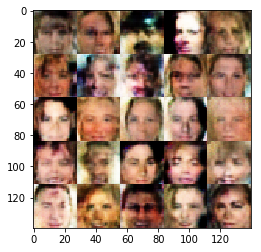

Epoch 1/1... Discriminator Loss: 0.6543... Generator Loss: 1.1910
Epoch 1/1... Discriminator Loss: 1.8778... Generator Loss: 0.2373
Epoch 1/1... Discriminator Loss: 1.2778... Generator Loss: 0.5012
Epoch 1/1... Discriminator Loss: 1.2575... Generator Loss: 0.8772
Epoch 1/1... Discriminator Loss: 1.9340... Generator Loss: 0.1727
Epoch 1/1... Discriminator Loss: 2.5962... Generator Loss: 1.6521
Epoch 1/1... Discriminator Loss: 1.8933... Generator Loss: 1.1777
Epoch 1/1... Discriminator Loss: 1.2796... Generator Loss: 0.7220
Epoch 1/1... Discriminator Loss: 1.5701... Generator Loss: 0.7224
Epoch 1/1... Discriminator Loss: 1.8320... Generator Loss: 0.2146


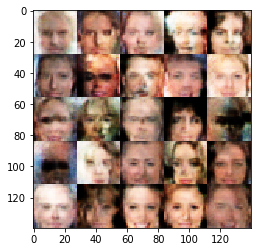

Epoch 1/1... Discriminator Loss: 2.1083... Generator Loss: 0.1646
Epoch 1/1... Discriminator Loss: 1.4442... Generator Loss: 0.4046
Epoch 1/1... Discriminator Loss: 1.3649... Generator Loss: 0.6341
Epoch 1/1... Discriminator Loss: 1.4620... Generator Loss: 0.4968
Epoch 1/1... Discriminator Loss: 1.1437... Generator Loss: 0.4647
Epoch 1/1... Discriminator Loss: 2.5887... Generator Loss: 2.1004
Epoch 1/1... Discriminator Loss: 1.5437... Generator Loss: 0.4042
Epoch 1/1... Discriminator Loss: 0.8730... Generator Loss: 0.7041
Epoch 1/1... Discriminator Loss: 1.2816... Generator Loss: 0.7515
Epoch 1/1... Discriminator Loss: 2.2213... Generator Loss: 0.1312


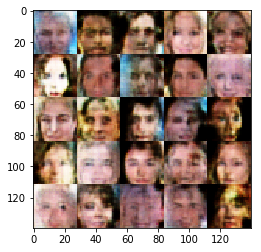

Epoch 1/1... Discriminator Loss: 0.9458... Generator Loss: 0.6868
Epoch 1/1... Discriminator Loss: 1.3396... Generator Loss: 0.3630
Epoch 1/1... Discriminator Loss: 1.3517... Generator Loss: 0.8871
Epoch 1/1... Discriminator Loss: 1.1868... Generator Loss: 0.6223
Epoch 1/1... Discriminator Loss: 1.4420... Generator Loss: 1.0711
Epoch 1/1... Discriminator Loss: 1.6469... Generator Loss: 0.3519
Epoch 1/1... Discriminator Loss: 1.2567... Generator Loss: 0.4950
Epoch 1/1... Discriminator Loss: 1.5958... Generator Loss: 0.5517
Epoch 1/1... Discriminator Loss: 1.3420... Generator Loss: 1.1317
Epoch 1/1... Discriminator Loss: 1.1854... Generator Loss: 0.4133


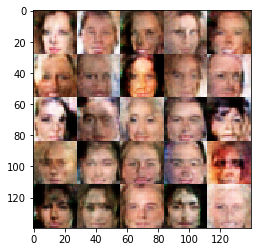

Epoch 1/1... Discriminator Loss: 1.3471... Generator Loss: 0.6092
Epoch 1/1... Discriminator Loss: 1.6975... Generator Loss: 0.7958
Epoch 1/1... Discriminator Loss: 1.2336... Generator Loss: 0.5149
Epoch 1/1... Discriminator Loss: 1.6447... Generator Loss: 0.2717
Epoch 1/1... Discriminator Loss: 1.7315... Generator Loss: 0.2862
Epoch 1/1... Discriminator Loss: 1.7992... Generator Loss: 2.1623
Epoch 1/1... Discriminator Loss: 0.7571... Generator Loss: 1.6754
Epoch 1/1... Discriminator Loss: 1.3194... Generator Loss: 0.3986
Epoch 1/1... Discriminator Loss: 1.4873... Generator Loss: 0.4277
Epoch 1/1... Discriminator Loss: 1.3225... Generator Loss: 0.9918


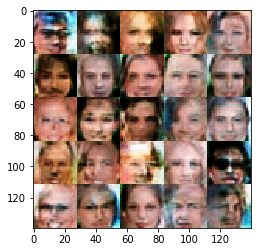

Epoch 1/1... Discriminator Loss: 0.7683... Generator Loss: 0.7787
Epoch 1/1... Discriminator Loss: 1.5899... Generator Loss: 0.3625
Epoch 1/1... Discriminator Loss: 0.9281... Generator Loss: 0.9129
Epoch 1/1... Discriminator Loss: 1.2018... Generator Loss: 0.7167
Epoch 1/1... Discriminator Loss: 1.4451... Generator Loss: 0.5063
Epoch 1/1... Discriminator Loss: 1.1840... Generator Loss: 0.5003
Epoch 1/1... Discriminator Loss: 1.3274... Generator Loss: 0.9505
Epoch 1/1... Discriminator Loss: 1.5559... Generator Loss: 0.4556
Epoch 1/1... Discriminator Loss: 1.7201... Generator Loss: 0.2377
Epoch 1/1... Discriminator Loss: 1.3661... Generator Loss: 0.5504


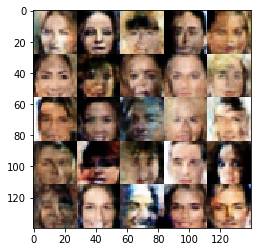

Epoch 1/1... Discriminator Loss: 0.5668... Generator Loss: 1.4766
Epoch 1/1... Discriminator Loss: 0.3630... Generator Loss: 1.6443
Epoch 1/1... Discriminator Loss: 1.3083... Generator Loss: 1.4039
Epoch 1/1... Discriminator Loss: 0.2292... Generator Loss: 2.5013
Epoch 1/1... Discriminator Loss: 1.2030... Generator Loss: 0.5315
Epoch 1/1... Discriminator Loss: 2.6487... Generator Loss: 0.0923
Epoch 1/1... Discriminator Loss: 0.9716... Generator Loss: 0.7220
Epoch 1/1... Discriminator Loss: 1.4159... Generator Loss: 0.5433
Epoch 1/1... Discriminator Loss: 1.5424... Generator Loss: 0.6214
Epoch 1/1... Discriminator Loss: 1.5948... Generator Loss: 0.3172


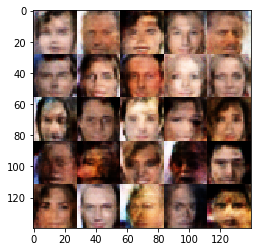

Epoch 1/1... Discriminator Loss: 1.7628... Generator Loss: 1.2107
Epoch 1/1... Discriminator Loss: 1.5907... Generator Loss: 0.3095
Epoch 1/1... Discriminator Loss: 1.2937... Generator Loss: 0.3738
Epoch 1/1... Discriminator Loss: 1.4223... Generator Loss: 0.3639
Epoch 1/1... Discriminator Loss: 1.8670... Generator Loss: 0.2243
Epoch 1/1... Discriminator Loss: 0.9965... Generator Loss: 0.7204
Epoch 1/1... Discriminator Loss: 2.4078... Generator Loss: 0.1225
Epoch 1/1... Discriminator Loss: 1.5720... Generator Loss: 0.5975
Epoch 1/1... Discriminator Loss: 1.1992... Generator Loss: 0.4724
Epoch 1/1... Discriminator Loss: 2.1387... Generator Loss: 1.3106


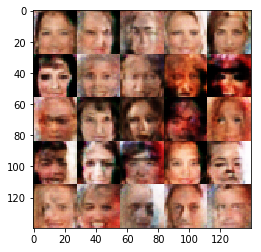

Epoch 1/1... Discriminator Loss: 1.1473... Generator Loss: 0.5553
Epoch 1/1... Discriminator Loss: 2.5706... Generator Loss: 0.1142
Epoch 1/1... Discriminator Loss: 1.7468... Generator Loss: 0.2813
Epoch 1/1... Discriminator Loss: 0.9227... Generator Loss: 0.7933
Epoch 1/1... Discriminator Loss: 1.3831... Generator Loss: 0.5204
Epoch 1/1... Discriminator Loss: 2.2116... Generator Loss: 0.1570
Epoch 1/1... Discriminator Loss: 1.9637... Generator Loss: 0.2327
Epoch 1/1... Discriminator Loss: 0.8037... Generator Loss: 0.7497
Epoch 1/1... Discriminator Loss: 1.3440... Generator Loss: 0.5126
Epoch 1/1... Discriminator Loss: 1.1941... Generator Loss: 0.4860


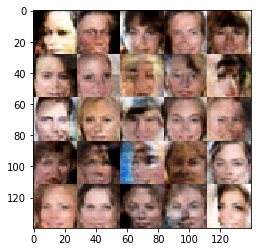

Epoch 1/1... Discriminator Loss: 1.5071... Generator Loss: 0.3443
Epoch 1/1... Discriminator Loss: 1.7944... Generator Loss: 1.5223
Epoch 1/1... Discriminator Loss: 1.0096... Generator Loss: 0.6351
Epoch 1/1... Discriminator Loss: 2.1164... Generator Loss: 0.1854
Epoch 1/1... Discriminator Loss: 1.1240... Generator Loss: 0.9019
Epoch 1/1... Discriminator Loss: 1.5524... Generator Loss: 0.4487
Epoch 1/1... Discriminator Loss: 1.5306... Generator Loss: 0.9775
Epoch 1/1... Discriminator Loss: 1.7331... Generator Loss: 0.7477
Epoch 1/1... Discriminator Loss: 1.0486... Generator Loss: 0.8941
Epoch 1/1... Discriminator Loss: 0.9581... Generator Loss: 0.5805


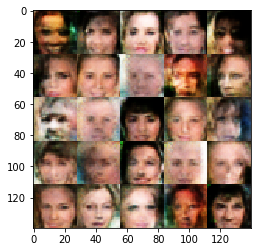

Epoch 1/1... Discriminator Loss: 1.5849... Generator Loss: 0.3533
Epoch 1/1... Discriminator Loss: 1.6370... Generator Loss: 0.3576
Epoch 1/1... Discriminator Loss: 1.0769... Generator Loss: 0.6776
Epoch 1/1... Discriminator Loss: 1.3968... Generator Loss: 0.4176
Epoch 1/1... Discriminator Loss: 0.6145... Generator Loss: 1.2200
Epoch 1/1... Discriminator Loss: 1.6855... Generator Loss: 0.3034
Epoch 1/1... Discriminator Loss: 1.2657... Generator Loss: 0.4854
Epoch 1/1... Discriminator Loss: 1.6678... Generator Loss: 0.3798
Epoch 1/1... Discriminator Loss: 1.5640... Generator Loss: 0.6225
Epoch 1/1... Discriminator Loss: 1.9115... Generator Loss: 0.4383


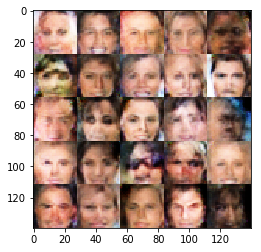

Epoch 1/1... Discriminator Loss: 1.7129... Generator Loss: 0.4951
Epoch 1/1... Discriminator Loss: 1.6722... Generator Loss: 0.4022
Epoch 1/1... Discriminator Loss: 1.6434... Generator Loss: 0.3610
Epoch 1/1... Discriminator Loss: 1.9656... Generator Loss: 0.2105
Epoch 1/1... Discriminator Loss: 1.3999... Generator Loss: 0.4145
Epoch 1/1... Discriminator Loss: 0.9344... Generator Loss: 1.6335
Epoch 1/1... Discriminator Loss: 1.4814... Generator Loss: 0.4924
Epoch 1/1... Discriminator Loss: 1.4710... Generator Loss: 0.4830
Epoch 1/1... Discriminator Loss: 0.8707... Generator Loss: 0.7873
Epoch 1/1... Discriminator Loss: 2.1893... Generator Loss: 0.1395


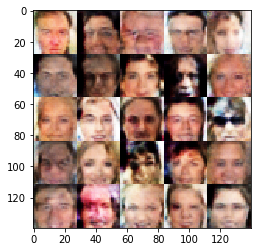

Epoch 1/1... Discriminator Loss: 0.8845... Generator Loss: 0.6534
Epoch 1/1... Discriminator Loss: 1.5017... Generator Loss: 0.7401
Epoch 1/1... Discriminator Loss: 2.2101... Generator Loss: 0.1336
Epoch 1/1... Discriminator Loss: 1.3302... Generator Loss: 0.6558
Epoch 1/1... Discriminator Loss: 1.7526... Generator Loss: 0.2710
Epoch 1/1... Discriminator Loss: 0.7276... Generator Loss: 1.1676
Epoch 1/1... Discriminator Loss: 1.5085... Generator Loss: 0.9966
Epoch 1/1... Discriminator Loss: 1.4240... Generator Loss: 0.5832
Epoch 1/1... Discriminator Loss: 1.7521... Generator Loss: 0.2825
Epoch 1/1... Discriminator Loss: 2.2717... Generator Loss: 0.1318


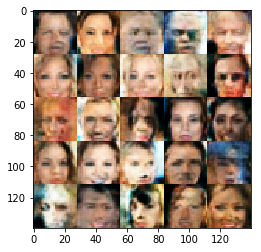

Epoch 1/1... Discriminator Loss: 1.1462... Generator Loss: 0.8072
Epoch 1/1... Discriminator Loss: 1.4872... Generator Loss: 0.6356
Epoch 1/1... Discriminator Loss: 1.5597... Generator Loss: 0.8061
Epoch 1/1... Discriminator Loss: 1.5552... Generator Loss: 0.3594
Epoch 1/1... Discriminator Loss: 1.5086... Generator Loss: 0.5045
Epoch 1/1... Discriminator Loss: 1.6119... Generator Loss: 0.2834
Epoch 1/1... Discriminator Loss: 1.4460... Generator Loss: 0.7468
Epoch 1/1... Discriminator Loss: 1.7423... Generator Loss: 0.2585
Epoch 1/1... Discriminator Loss: 1.0750... Generator Loss: 0.5218
Epoch 1/1... Discriminator Loss: 1.7245... Generator Loss: 0.5548


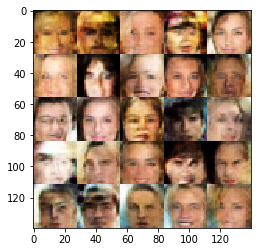

Epoch 1/1... Discriminator Loss: 1.6894... Generator Loss: 0.5542
Epoch 1/1... Discriminator Loss: 2.0055... Generator Loss: 0.2090
Epoch 1/1... Discriminator Loss: 1.2002... Generator Loss: 0.7160
Epoch 1/1... Discriminator Loss: 1.9871... Generator Loss: 0.4387
Epoch 1/1... Discriminator Loss: 1.1958... Generator Loss: 0.7274
Epoch 1/1... Discriminator Loss: 1.6878... Generator Loss: 0.2864
Epoch 1/1... Discriminator Loss: 1.5633... Generator Loss: 0.2866
Epoch 1/1... Discriminator Loss: 0.8734... Generator Loss: 0.7300
Epoch 1/1... Discriminator Loss: 1.7773... Generator Loss: 0.2705
Epoch 1/1... Discriminator Loss: 1.4258... Generator Loss: 0.4892


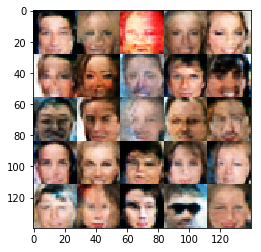

Epoch 1/1... Discriminator Loss: 1.4650... Generator Loss: 0.4468
Epoch 1/1... Discriminator Loss: 1.1971... Generator Loss: 0.4443
Epoch 1/1... Discriminator Loss: 1.9120... Generator Loss: 0.2027
Epoch 1/1... Discriminator Loss: 1.8575... Generator Loss: 0.2712
Epoch 1/1... Discriminator Loss: 2.3347... Generator Loss: 0.1297
Epoch 1/1... Discriminator Loss: 2.1063... Generator Loss: 0.1769
Epoch 1/1... Discriminator Loss: 0.2544... Generator Loss: 2.8048
Epoch 1/1... Discriminator Loss: 1.1483... Generator Loss: 1.1279
Epoch 1/1... Discriminator Loss: 1.2203... Generator Loss: 0.5549
Epoch 1/1... Discriminator Loss: 1.8379... Generator Loss: 1.4729


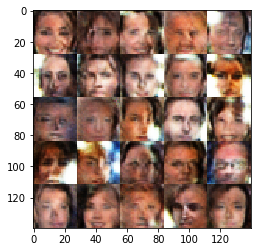

Epoch 1/1... Discriminator Loss: 0.4206... Generator Loss: 1.3063
Epoch 1/1... Discriminator Loss: 2.4642... Generator Loss: 0.1241
Epoch 1/1... Discriminator Loss: 1.4748... Generator Loss: 0.4921
Epoch 1/1... Discriminator Loss: 1.1448... Generator Loss: 0.5708
Epoch 1/1... Discriminator Loss: 1.2653... Generator Loss: 0.5712
Epoch 1/1... Discriminator Loss: 1.0994... Generator Loss: 0.5079
Epoch 1/1... Discriminator Loss: 1.4104... Generator Loss: 0.5123
Epoch 1/1... Discriminator Loss: 1.5626... Generator Loss: 0.4128
Epoch 1/1... Discriminator Loss: 1.7675... Generator Loss: 0.2813
Epoch 1/1... Discriminator Loss: 1.9381... Generator Loss: 0.2751


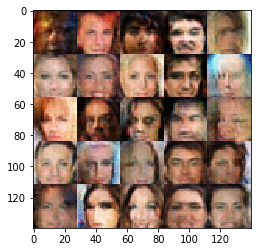

Epoch 1/1... Discriminator Loss: 2.0000... Generator Loss: 0.2038
Epoch 1/1... Discriminator Loss: 1.8527... Generator Loss: 0.2316
Epoch 1/1... Discriminator Loss: 1.5332... Generator Loss: 0.5247
Epoch 1/1... Discriminator Loss: 2.1640... Generator Loss: 0.1559
Epoch 1/1... Discriminator Loss: 1.7026... Generator Loss: 0.6334
Epoch 1/1... Discriminator Loss: 1.2641... Generator Loss: 1.3575
Epoch 1/1... Discriminator Loss: 1.3607... Generator Loss: 0.4200
Epoch 1/1... Discriminator Loss: 1.3192... Generator Loss: 0.8986
Epoch 1/1... Discriminator Loss: 1.6983... Generator Loss: 0.3701
Epoch 1/1... Discriminator Loss: 0.4967... Generator Loss: 1.1617


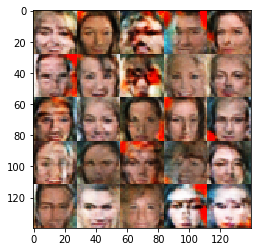

Epoch 1/1... Discriminator Loss: 0.7540... Generator Loss: 0.8371
Epoch 1/1... Discriminator Loss: 0.1579... Generator Loss: 2.3208
Epoch 1/1... Discriminator Loss: 0.0692... Generator Loss: 4.0946
Epoch 1/1... Discriminator Loss: 0.9945... Generator Loss: 0.5745
Epoch 1/1... Discriminator Loss: 2.0751... Generator Loss: 0.6297
Epoch 1/1... Discriminator Loss: 1.5028... Generator Loss: 0.3951
Epoch 1/1... Discriminator Loss: 1.7669... Generator Loss: 0.5420
Epoch 1/1... Discriminator Loss: 1.4985... Generator Loss: 0.7858
Epoch 1/1... Discriminator Loss: 1.6721... Generator Loss: 0.3934
Epoch 1/1... Discriminator Loss: 2.3549... Generator Loss: 0.1196


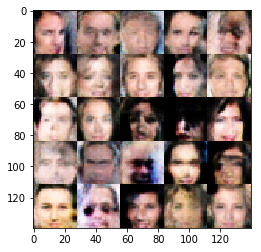

Epoch 1/1... Discriminator Loss: 1.8557... Generator Loss: 0.2208
Epoch 1/1... Discriminator Loss: 1.5970... Generator Loss: 0.4034
Epoch 1/1... Discriminator Loss: 2.9777... Generator Loss: 2.7285
Epoch 1/1... Discriminator Loss: 1.7845... Generator Loss: 0.4726
Epoch 1/1... Discriminator Loss: 1.2963... Generator Loss: 0.5891
Epoch 1/1... Discriminator Loss: 1.4368... Generator Loss: 0.5104
Epoch 1/1... Discriminator Loss: 1.6280... Generator Loss: 0.5270
Epoch 1/1... Discriminator Loss: 1.5640... Generator Loss: 0.4424
Epoch 1/1... Discriminator Loss: 1.8590... Generator Loss: 0.4517
Epoch 1/1... Discriminator Loss: 1.8748... Generator Loss: 0.2575


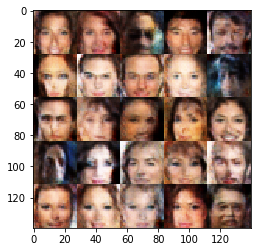

Epoch 1/1... Discriminator Loss: 1.6745... Generator Loss: 0.2905
Epoch 1/1... Discriminator Loss: 1.6627... Generator Loss: 0.3448
Epoch 1/1... Discriminator Loss: 1.2372... Generator Loss: 0.5873
Epoch 1/1... Discriminator Loss: 0.8418... Generator Loss: 0.7103
Epoch 1/1... Discriminator Loss: 1.4548... Generator Loss: 0.4766
Epoch 1/1... Discriminator Loss: 1.7276... Generator Loss: 0.3242
Epoch 1/1... Discriminator Loss: 1.6449... Generator Loss: 0.8515
Epoch 1/1... Discriminator Loss: 1.4695... Generator Loss: 1.0083
Epoch 1/1... Discriminator Loss: 1.5600... Generator Loss: 0.4711
Epoch 1/1... Discriminator Loss: 2.4620... Generator Loss: 1.3875


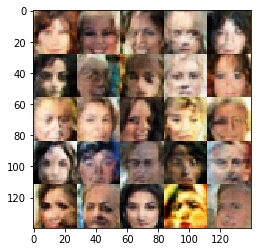

Epoch 1/1... Discriminator Loss: 1.9199... Generator Loss: 0.2436
Epoch 1/1... Discriminator Loss: 1.9592... Generator Loss: 0.2705
Epoch 1/1... Discriminator Loss: 1.4025... Generator Loss: 0.5419
Epoch 1/1... Discriminator Loss: 1.5458... Generator Loss: 0.5098
Epoch 1/1... Discriminator Loss: 0.9584... Generator Loss: 0.8990
Epoch 1/1... Discriminator Loss: 1.1574... Generator Loss: 0.6344
Epoch 1/1... Discriminator Loss: 1.4714... Generator Loss: 0.6789
Epoch 1/1... Discriminator Loss: 1.5756... Generator Loss: 0.3694
Epoch 1/1... Discriminator Loss: 2.4635... Generator Loss: 0.1154
Epoch 1/1... Discriminator Loss: 1.6782... Generator Loss: 0.3283


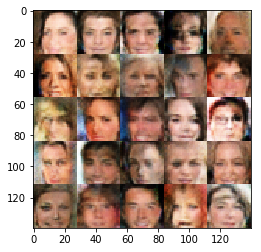

Epoch 1/1... Discriminator Loss: 1.9744... Generator Loss: 0.2557
Epoch 1/1... Discriminator Loss: 1.3371... Generator Loss: 0.5466
Epoch 1/1... Discriminator Loss: 1.4256... Generator Loss: 0.3893
Epoch 1/1... Discriminator Loss: 1.2674... Generator Loss: 0.7259
Epoch 1/1... Discriminator Loss: 1.7661... Generator Loss: 0.3277
Epoch 1/1... Discriminator Loss: 1.8247... Generator Loss: 0.2600
Epoch 1/1... Discriminator Loss: 1.6378... Generator Loss: 0.4092
Epoch 1/1... Discriminator Loss: 1.7996... Generator Loss: 0.2599
Epoch 1/1... Discriminator Loss: 1.1975... Generator Loss: 0.7276
Epoch 1/1... Discriminator Loss: 1.9858... Generator Loss: 0.2467


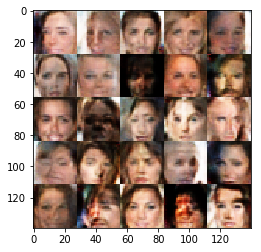

Epoch 1/1... Discriminator Loss: 1.2189... Generator Loss: 0.6000
Epoch 1/1... Discriminator Loss: 1.7800... Generator Loss: 0.2593
Epoch 1/1... Discriminator Loss: 2.5476... Generator Loss: 0.1001
Epoch 1/1... Discriminator Loss: 1.2586... Generator Loss: 0.5136
Epoch 1/1... Discriminator Loss: 1.8373... Generator Loss: 0.2721
Epoch 1/1... Discriminator Loss: 1.2675... Generator Loss: 0.6333
Epoch 1/1... Discriminator Loss: 1.6044... Generator Loss: 0.4158
Epoch 1/1... Discriminator Loss: 1.4105... Generator Loss: 0.4046
Epoch 1/1... Discriminator Loss: 1.8345... Generator Loss: 0.2450
Epoch 1/1... Discriminator Loss: 1.7575... Generator Loss: 0.3655


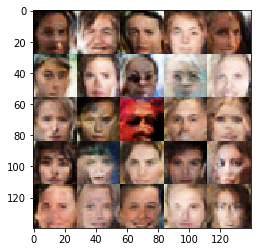

Epoch 1/1... Discriminator Loss: 1.5138... Generator Loss: 0.4626
Epoch 1/1... Discriminator Loss: 1.7485... Generator Loss: 0.3188
Epoch 1/1... Discriminator Loss: 1.7897... Generator Loss: 0.2381
Epoch 1/1... Discriminator Loss: 1.3368... Generator Loss: 0.7120
Epoch 1/1... Discriminator Loss: 1.6480... Generator Loss: 0.3474
Epoch 1/1... Discriminator Loss: 1.4715... Generator Loss: 0.3687
Epoch 1/1... Discriminator Loss: 1.3570... Generator Loss: 0.5720
Epoch 1/1... Discriminator Loss: 1.8460... Generator Loss: 0.2438
Epoch 1/1... Discriminator Loss: 1.5919... Generator Loss: 0.3630
Epoch 1/1... Discriminator Loss: 1.7039... Generator Loss: 0.3428


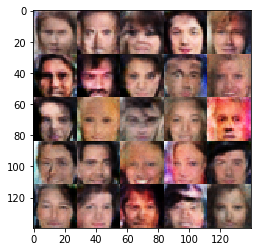

Epoch 1/1... Discriminator Loss: 2.0495... Generator Loss: 0.1931
Epoch 1/1... Discriminator Loss: 1.6046... Generator Loss: 0.3915
Epoch 1/1... Discriminator Loss: 1.2513... Generator Loss: 0.4732
Epoch 1/1... Discriminator Loss: 1.5770... Generator Loss: 0.4308
Epoch 1/1... Discriminator Loss: 1.7934... Generator Loss: 0.2964
Epoch 1/1... Discriminator Loss: 1.7924... Generator Loss: 0.3152
Epoch 1/1... Discriminator Loss: 1.2662... Generator Loss: 0.4401
Epoch 1/1... Discriminator Loss: 1.4641... Generator Loss: 0.4489
Epoch 1/1... Discriminator Loss: 2.0493... Generator Loss: 0.5054
Epoch 1/1... Discriminator Loss: 1.6694... Generator Loss: 0.9467


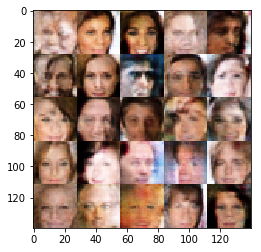

Epoch 1/1... Discriminator Loss: 1.8847... Generator Loss: 0.2324
Epoch 1/1... Discriminator Loss: 1.6292... Generator Loss: 0.7361
Epoch 1/1... Discriminator Loss: 1.9269... Generator Loss: 0.2425
Epoch 1/1... Discriminator Loss: 1.4017... Generator Loss: 0.7718
Epoch 1/1... Discriminator Loss: 1.6578... Generator Loss: 0.2834
Epoch 1/1... Discriminator Loss: 1.4296... Generator Loss: 0.4851
Epoch 1/1... Discriminator Loss: 1.2518... Generator Loss: 0.4633
Epoch 1/1... Discriminator Loss: 1.1159... Generator Loss: 0.6524
Epoch 1/1... Discriminator Loss: 1.5723... Generator Loss: 0.4147
Epoch 1/1... Discriminator Loss: 1.7727... Generator Loss: 0.3876


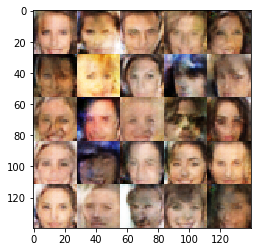

Epoch 1/1... Discriminator Loss: 1.7880... Generator Loss: 0.2772
Epoch 1/1... Discriminator Loss: 1.6333... Generator Loss: 0.3201
Epoch 1/1... Discriminator Loss: 1.6154... Generator Loss: 0.4333
Epoch 1/1... Discriminator Loss: 2.1123... Generator Loss: 0.2319
Epoch 1/1... Discriminator Loss: 1.2976... Generator Loss: 0.4317
Epoch 1/1... Discriminator Loss: 1.3616... Generator Loss: 0.4349
Epoch 1/1... Discriminator Loss: 1.9691... Generator Loss: 0.1942
Epoch 1/1... Discriminator Loss: 1.8222... Generator Loss: 0.4115
Epoch 1/1... Discriminator Loss: 1.6127... Generator Loss: 0.4803
Epoch 1/1... Discriminator Loss: 1.2067... Generator Loss: 0.6649


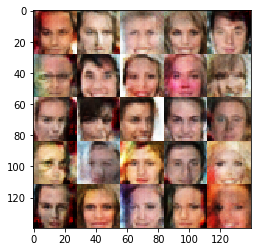

Epoch 1/1... Discriminator Loss: 1.3782... Generator Loss: 0.5200
Epoch 1/1... Discriminator Loss: 1.3566... Generator Loss: 0.5599
Epoch 1/1... Discriminator Loss: 1.8654... Generator Loss: 0.2388
Epoch 1/1... Discriminator Loss: 1.8204... Generator Loss: 0.3156
Epoch 1/1... Discriminator Loss: 1.3878... Generator Loss: 0.4488
Epoch 1/1... Discriminator Loss: 1.9450... Generator Loss: 0.2778
Epoch 1/1... Discriminator Loss: 1.8071... Generator Loss: 0.2776
Epoch 1/1... Discriminator Loss: 1.7315... Generator Loss: 0.2869
Epoch 1/1... Discriminator Loss: 1.3629... Generator Loss: 0.3961
Epoch 1/1... Discriminator Loss: 1.5798... Generator Loss: 0.3513


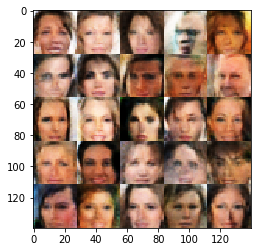

Epoch 1/1... Discriminator Loss: 1.5553... Generator Loss: 0.3760
Epoch 1/1... Discriminator Loss: 1.9889... Generator Loss: 0.3006
Epoch 1/1... Discriminator Loss: 1.6018... Generator Loss: 0.3509
Epoch 1/1... Discriminator Loss: 1.3932... Generator Loss: 0.4861
Epoch 1/1... Discriminator Loss: 1.3234... Generator Loss: 0.6760
Epoch 1/1... Discriminator Loss: 1.5158... Generator Loss: 0.5326
Epoch 1/1... Discriminator Loss: 1.5784... Generator Loss: 0.3183
Epoch 1/1... Discriminator Loss: 1.9437... Generator Loss: 0.2142
Epoch 1/1... Discriminator Loss: 1.1512... Generator Loss: 0.7983
Epoch 1/1... Discriminator Loss: 1.5727... Generator Loss: 0.3489


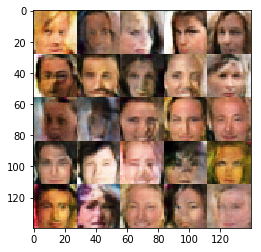

Epoch 1/1... Discriminator Loss: 1.1142... Generator Loss: 0.6370
Epoch 1/1... Discriminator Loss: 1.3439... Generator Loss: 0.4444
Epoch 1/1... Discriminator Loss: 1.8032... Generator Loss: 0.2366
Epoch 1/1... Discriminator Loss: 1.6083... Generator Loss: 0.3700
Epoch 1/1... Discriminator Loss: 1.4289... Generator Loss: 0.6696
Epoch 1/1... Discriminator Loss: 2.1344... Generator Loss: 0.2172
Epoch 1/1... Discriminator Loss: 1.9091... Generator Loss: 0.2540
Epoch 1/1... Discriminator Loss: 1.9288... Generator Loss: 0.2485
Epoch 1/1... Discriminator Loss: 1.0735... Generator Loss: 0.8066
Epoch 1/1... Discriminator Loss: 1.3382... Generator Loss: 0.5735


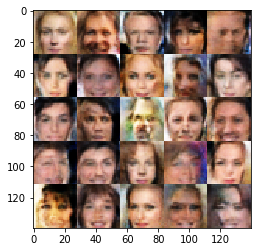

Epoch 1/1... Discriminator Loss: 1.5751... Generator Loss: 0.5653
Epoch 1/1... Discriminator Loss: 1.4133... Generator Loss: 0.8739
Epoch 1/1... Discriminator Loss: 1.6832... Generator Loss: 0.2394
Epoch 1/1... Discriminator Loss: 2.0117... Generator Loss: 0.2507
Epoch 1/1... Discriminator Loss: 1.7923... Generator Loss: 0.3995
Epoch 1/1... Discriminator Loss: 1.8675... Generator Loss: 0.2226
Epoch 1/1... Discriminator Loss: 1.8057... Generator Loss: 0.3175
Epoch 1/1... Discriminator Loss: 1.0282... Generator Loss: 0.6957
Epoch 1/1... Discriminator Loss: 1.7642... Generator Loss: 0.3090
Epoch 1/1... Discriminator Loss: 1.3618... Generator Loss: 0.5600


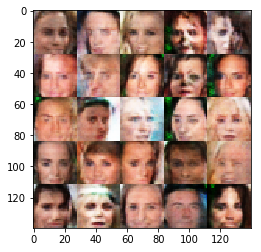

Epoch 1/1... Discriminator Loss: 2.2102... Generator Loss: 0.1748
Epoch 1/1... Discriminator Loss: 1.6373... Generator Loss: 0.6781
Epoch 1/1... Discriminator Loss: 1.6557... Generator Loss: 0.2813
Epoch 1/1... Discriminator Loss: 1.7846... Generator Loss: 0.2995
Epoch 1/1... Discriminator Loss: 1.6525... Generator Loss: 0.3523
Epoch 1/1... Discriminator Loss: 1.3808... Generator Loss: 0.3946
Epoch 1/1... Discriminator Loss: 1.6295... Generator Loss: 0.4559
Epoch 1/1... Discriminator Loss: 0.9636... Generator Loss: 0.7649
Epoch 1/1... Discriminator Loss: 1.3950... Generator Loss: 0.6541
Epoch 1/1... Discriminator Loss: 1.3597... Generator Loss: 0.5257


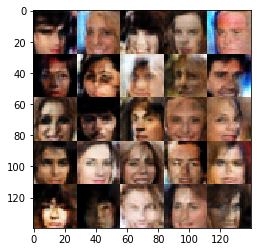

Epoch 1/1... Discriminator Loss: 1.1927... Generator Loss: 0.8870
Epoch 1/1... Discriminator Loss: 1.4059... Generator Loss: 0.5559
Epoch 1/1... Discriminator Loss: 1.3639... Generator Loss: 0.4503
Epoch 1/1... Discriminator Loss: 1.5087... Generator Loss: 0.3925
Epoch 1/1... Discriminator Loss: 1.6852... Generator Loss: 0.3626
Epoch 1/1... Discriminator Loss: 1.6737... Generator Loss: 0.3580
Epoch 1/1... Discriminator Loss: 1.6647... Generator Loss: 0.3062
Epoch 1/1... Discriminator Loss: 1.7674... Generator Loss: 0.3032
Epoch 1/1... Discriminator Loss: 1.9969... Generator Loss: 0.2585
Epoch 1/1... Discriminator Loss: 0.9705... Generator Loss: 0.7418


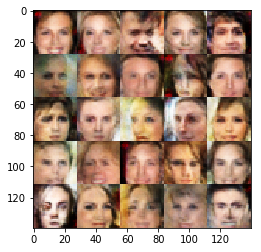

Epoch 1/1... Discriminator Loss: 2.1777... Generator Loss: 0.1665
Epoch 1/1... Discriminator Loss: 1.5693... Generator Loss: 0.4003
Epoch 1/1... Discriminator Loss: 1.3952... Generator Loss: 0.5519
Epoch 1/1... Discriminator Loss: 1.6415... Generator Loss: 0.3630
Epoch 1/1... Discriminator Loss: 1.9851... Generator Loss: 0.2133
Epoch 1/1... Discriminator Loss: 1.4192... Generator Loss: 0.4446
Epoch 1/1... Discriminator Loss: 2.0503... Generator Loss: 0.2071
Epoch 1/1... Discriminator Loss: 1.4835... Generator Loss: 0.5416
Epoch 1/1... Discriminator Loss: 1.7324... Generator Loss: 0.5544
Epoch 1/1... Discriminator Loss: 1.3225... Generator Loss: 0.9180


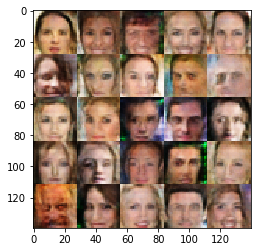

Epoch 1/1... Discriminator Loss: 2.1006... Generator Loss: 0.1664
Epoch 1/1... Discriminator Loss: 1.5224... Generator Loss: 0.3396
Epoch 1/1... Discriminator Loss: 1.3821... Generator Loss: 0.6446
Epoch 1/1... Discriminator Loss: 1.7657... Generator Loss: 0.2544
Epoch 1/1... Discriminator Loss: 1.8033... Generator Loss: 0.2974
Epoch 1/1... Discriminator Loss: 1.7719... Generator Loss: 0.3357
Epoch 1/1... Discriminator Loss: 1.7966... Generator Loss: 0.2991
Epoch 1/1... Discriminator Loss: 1.7627... Generator Loss: 0.2877
Epoch 1/1... Discriminator Loss: 1.4488... Generator Loss: 0.4317
Epoch 1/1... Discriminator Loss: 2.1139... Generator Loss: 0.2025


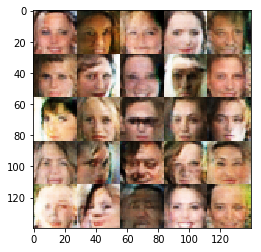

Epoch 1/1... Discriminator Loss: 1.7664... Generator Loss: 0.2663
Epoch 1/1... Discriminator Loss: 1.7474... Generator Loss: 0.3736
Epoch 1/1... Discriminator Loss: 1.9582... Generator Loss: 0.2247
Epoch 1/1... Discriminator Loss: 1.4923... Generator Loss: 0.6503
Epoch 1/1... Discriminator Loss: 1.8339... Generator Loss: 0.2627
Epoch 1/1... Discriminator Loss: 1.2506... Generator Loss: 0.6437
Epoch 1/1... Discriminator Loss: 1.6003... Generator Loss: 0.3251
Epoch 1/1... Discriminator Loss: 1.6092... Generator Loss: 0.4710
Epoch 1/1... Discriminator Loss: 0.9733... Generator Loss: 0.8295
Epoch 1/1... Discriminator Loss: 1.2232... Generator Loss: 0.5865


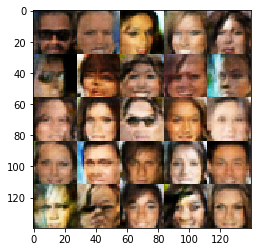

Epoch 1/1... Discriminator Loss: 1.5784... Generator Loss: 0.5990
Epoch 1/1... Discriminator Loss: 1.5153... Generator Loss: 0.4100
Epoch 1/1... Discriminator Loss: 0.8306... Generator Loss: 1.0257
Epoch 1/1... Discriminator Loss: 1.5310... Generator Loss: 0.6664
Epoch 1/1... Discriminator Loss: 1.6215... Generator Loss: 0.3651
Epoch 1/1... Discriminator Loss: 1.2953... Generator Loss: 0.6756
Epoch 1/1... Discriminator Loss: 1.8645... Generator Loss: 0.2954
Epoch 1/1... Discriminator Loss: 1.5229... Generator Loss: 0.4674
Epoch 1/1... Discriminator Loss: 1.6856... Generator Loss: 0.4157
Epoch 1/1... Discriminator Loss: 1.8629... Generator Loss: 0.2875


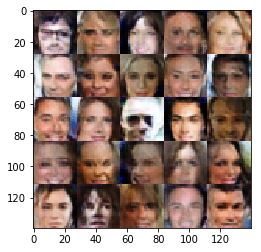

Epoch 1/1... Discriminator Loss: 1.9917... Generator Loss: 0.2441
Epoch 1/1... Discriminator Loss: 1.6443... Generator Loss: 0.4534
Epoch 1/1... Discriminator Loss: 1.5819... Generator Loss: 0.3498
Epoch 1/1... Discriminator Loss: 1.8679... Generator Loss: 0.2403
Epoch 1/1... Discriminator Loss: 1.5760... Generator Loss: 0.4612
Epoch 1/1... Discriminator Loss: 1.3989... Generator Loss: 0.3637
Epoch 1/1... Discriminator Loss: 1.6869... Generator Loss: 0.3282
Epoch 1/1... Discriminator Loss: 1.7922... Generator Loss: 0.3937
Epoch 1/1... Discriminator Loss: 1.4839... Generator Loss: 0.6724
Epoch 1/1... Discriminator Loss: 1.5122... Generator Loss: 0.4505


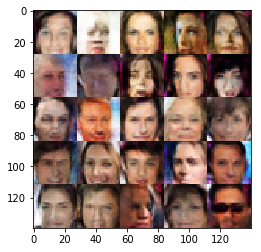

Epoch 1/1... Discriminator Loss: 1.7855... Generator Loss: 0.2578
Epoch 1/1... Discriminator Loss: 2.1488... Generator Loss: 0.1974
Epoch 1/1... Discriminator Loss: 2.3053... Generator Loss: 0.1298
Epoch 1/1... Discriminator Loss: 1.3101... Generator Loss: 0.7410
Epoch 1/1... Discriminator Loss: 1.2611... Generator Loss: 0.9061
Epoch 1/1... Discriminator Loss: 1.8753... Generator Loss: 0.2835
Epoch 1/1... Discriminator Loss: 1.8127... Generator Loss: 0.9625
Epoch 1/1... Discriminator Loss: 1.2019... Generator Loss: 0.5340
Epoch 1/1... Discriminator Loss: 1.6042... Generator Loss: 0.3462
Epoch 1/1... Discriminator Loss: 1.5057... Generator Loss: 0.5391


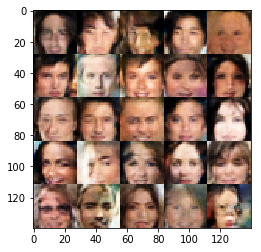

Epoch 1/1... Discriminator Loss: 1.2056... Generator Loss: 0.5085
Epoch 1/1... Discriminator Loss: 2.1012... Generator Loss: 0.1521
Epoch 1/1... Discriminator Loss: 1.7101... Generator Loss: 0.4721
Epoch 1/1... Discriminator Loss: 1.9348... Generator Loss: 0.3803
Epoch 1/1... Discriminator Loss: 1.7379... Generator Loss: 0.4161
Epoch 1/1... Discriminator Loss: 1.3500... Generator Loss: 0.5308
Epoch 1/1... Discriminator Loss: 1.7479... Generator Loss: 0.3374
Epoch 1/1... Discriminator Loss: 1.4106... Generator Loss: 1.0253
Epoch 1/1... Discriminator Loss: 1.3398... Generator Loss: 0.4611
Epoch 1/1... Discriminator Loss: 1.4939... Generator Loss: 0.6961


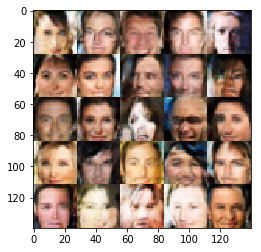

Epoch 1/1... Discriminator Loss: 1.7997... Generator Loss: 0.2650
Epoch 1/1... Discriminator Loss: 2.3347... Generator Loss: 0.1694
Epoch 1/1... Discriminator Loss: 1.4451... Generator Loss: 0.4179
Epoch 1/1... Discriminator Loss: 1.4495... Generator Loss: 0.5102
Epoch 1/1... Discriminator Loss: 1.4265... Generator Loss: 0.6169
Epoch 1/1... Discriminator Loss: 1.7539... Generator Loss: 0.3078
Epoch 1/1... Discriminator Loss: 1.5419... Generator Loss: 0.4105
Epoch 1/1... Discriminator Loss: 1.6626... Generator Loss: 0.3452
Epoch 1/1... Discriminator Loss: 1.6772... Generator Loss: 0.3148
Epoch 1/1... Discriminator Loss: 1.6077... Generator Loss: 0.4419


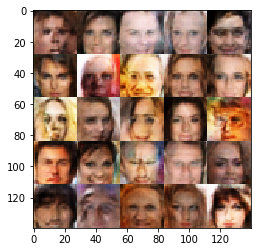

Epoch 1/1... Discriminator Loss: 1.3703... Generator Loss: 0.4981
Epoch 1/1... Discriminator Loss: 1.3352... Generator Loss: 0.8027
Epoch 1/1... Discriminator Loss: 1.8999... Generator Loss: 0.2167
Epoch 1/1... Discriminator Loss: 1.5451... Generator Loss: 0.4265
Epoch 1/1... Discriminator Loss: 1.9303... Generator Loss: 0.3662
Epoch 1/1... Discriminator Loss: 1.6827... Generator Loss: 0.3226
Epoch 1/1... Discriminator Loss: 1.6122... Generator Loss: 0.4644
Epoch 1/1... Discriminator Loss: 2.0081... Generator Loss: 0.2041
Epoch 1/1... Discriminator Loss: 1.1180... Generator Loss: 0.7771
Epoch 1/1... Discriminator Loss: 1.5655... Generator Loss: 0.6229


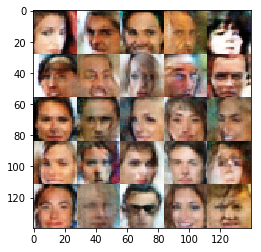

Epoch 1/1... Discriminator Loss: 1.2310... Generator Loss: 0.6682
Epoch 1/1... Discriminator Loss: 1.6250... Generator Loss: 0.4269
Epoch 1/1... Discriminator Loss: 1.3517... Generator Loss: 0.4047


In [23]:
batch_size = 32
z_dim = 512
learning_rate = 0.0005
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.